In [31]:

import numpy as np

In [32]:
import pandas as pd

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [34]:
df_diabetes = pd.read_csv('/Users/vineelakolagani/Desktop/PDS3/data_raw/diabetes.csv')

In [35]:
population_98th_percentile = np.percentile(df_diabetes['BMI'], 98, interpolation='linear', axis=0, keepdims=False)

/var/folders/_g/66b19ft10ps10wmlh9w3kzp80000gn/T/ipykernel_2198/1209922550.py:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  population_98th_percentile = np.percentile(df_diabetes['BMI'], 98, interpolation='linear', axis=0, keepdims=False)


In [36]:
# Calculate the 98th percentile of BMI for the sample(25)
sample25_98th_percentile = np.percentile(sample25['BMI'], 98, interpolation='linear', axis=0, keepdims=False)

/var/folders/_g/66b19ft10ps10wmlh9w3kzp80000gn/T/ipykernel_2198/2428227841.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  sample25_98th_percentile = np.percentile(sample25['BMI'], 98, interpolation='linear', axis=0, keepdims=False)


In [37]:
print(f"Population 98th Percentile BMI: {population_98th_percentile:.2f}")
print(f"Sample(25) 98th Percentile BMI: {sample25_98th_percentile:.2f}")


Population 98th Percentile BMI: 47.53
Sample(25) 98th Percentile BMI: 51.59


In [38]:
# Create a combined data frame for population and sample data
combined_data = pd.concat([df_diabetes.assign(Group='Population'), sample25.assign(Group='Sample(25)')])
%matplotlib inline

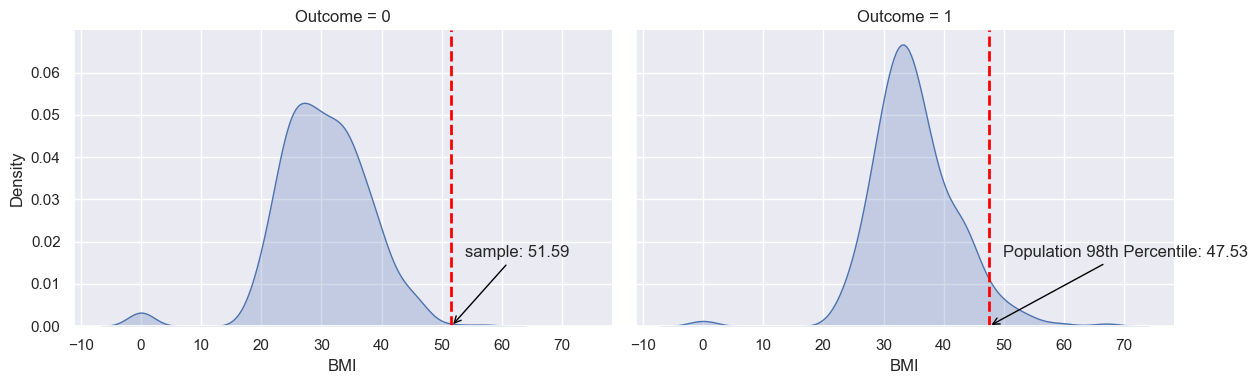

In [39]:
grid = sns.FacetGrid(df_diabetes, col="Outcome", height=4, aspect=1.5)
grid.map(sns.kdeplot, "BMI", fill=True)
grid.set_axis_labels("BMI", "Density")

# Add vertical lines for the 98th percentile
grid.axes[0, 0].axvline(sample25_98th_percentile, color='red', linestyle='dashed', linewidth=2)
grid.axes[0, 1].axvline(population_98th_percentile, color='red', linestyle='dashed', linewidth=2)

# Add annotations
grid.axes[0, 0].annotate(f'sample: {round(sample25_98th_percentile, 2)}',
                        xy=(sample25_98th_percentile, 0), xytext=(10, 50),
                        textcoords='offset points', arrowprops=dict(arrowstyle="->",color='black'))
grid.axes[0, 1].annotate(f'Population 98th Percentile: {round(population_98th_percentile, 2)}',
                        xy=(population_98th_percentile, 0), xytext=(10, 50),
                        textcoords='offset points', arrowprops=dict(arrowstyle="->",color='black'))

results_dir = ('/Users/vineelakolagani/Desktop/PDS3/results')


# Save the plot in the 'results' directory
plt.savefig(os.path.join(results_dir, 'bmi.png'))

plt.show()